Задача – написать функцию haversine для подсчета расстояния между пунктами отправления и прибытия и, используя  pd.iterrows(), создать колонку distance с подсчитанным расстоянием. 

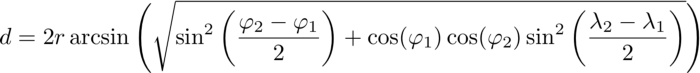

In [1]:
import pandas as pd
import numpy as np

In [3]:
nyc = pd.read_csv('nyc.csv.zip', compression='zip')

In [4]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [19]:
def haversine(pick_long, pick_lat, drop_long, drop_lat, radius=6371):
    # Convert degrees to radians
    pick_long, pick_lat, drop_long, drop_lat = [np.rad2deg(x) for x in (pick_long, pick_lat, drop_long, drop_lat)]
    
    # Compute terms
    sin_lat = np.sin((drop_lat - pick_lat) / 2) ** 2
    cos_lat = np.cos(pick_lat)*np.cos(drop_lat)
    sin_long = np.sin((drop_long - pick_long) / 2) ** 2
    
    # Result computations
    return 2 * radius * np.arcsin(np.sqrt(sin_lat + cos_lat*sin_long))

In [26]:
#distances = []

#for row in nyc.itertuples():
#    distance = haversine(row.pickup_longitude, row.pickup_latitude, row.dropoff_longitude, row.dropoff_latitude)
#    distances.append(distance)

In [31]:
# Самый быстрый способ
nyc['distances'] = haversine(nyc.pickup_longitude.values, nyc.pickup_latitude.values, nyc.dropoff_longitude.values, nyc.dropoff_latitude.values)

In [32]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distances
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,3300.957400
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,14667.217719
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,4229.607586
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,9200.925939
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,5833.999193
